In [11]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
def generate_sample_set(mu, variance, priors):
    uniform_rands = [np.zeros(4)]*4

    for i in range(4):
        if i in (0, 2):
            set_size = SAMPLE_SET_SIZE*priors[0]
        else: 
            set_size = SAMPLE_SET_SIZE*priors[1]
            
        uniform_rands[i] = np.random.normal(mu[i], np.sqrt(variance[i]), int(set_size)) 

        headers = "x1 x2 class".split()
    class1 = pd.DataFrame({'x1': uniform_rands[0], 'x2': uniform_rands[2], 
                          'class': 'w1'}, columns=headers)
    class2 = pd.DataFrame({'x1': uniform_rands[1], 'x2': uniform_rands[3], 
                          'class': 'w2'}, columns=headers)
    class2.index=class2.index+int(SAMPLE_SET_SIZE/2)

    return pd.concat([class1, class2])



# Sample set parameters  
SAMPLE_SET_SIZE = 200
mu = [0, 1, 0, 1]
variance = [1, 2, 1, 2]
priors = [0.9, 0.1]


# Linearlly separable sample set 
# mu = [0, 4, 0, 4]
# variance = [1, 1, 1, 1]



sample_set = generate_sample_set(mu, variance, priors)

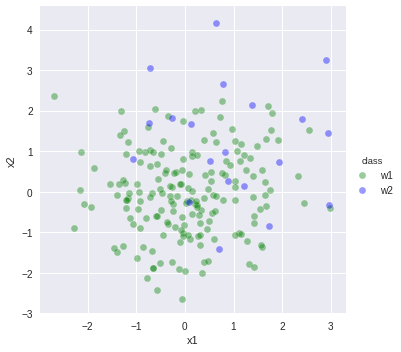

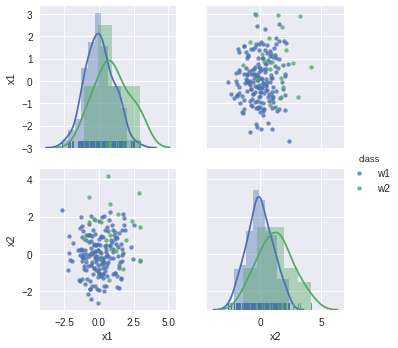

In [14]:
colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=0.4, linewidth=0.5, edgecolor='white')
g.add_legend()

g = sns.PairGrid(sample_set, hue='class')
g.map_diag(sns.distplot, kde=True, rug=True)
g.map_offdiag(plt.scatter, alpha=0.8,s=15)
g.add_legend()             


In [16]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)


In [113]:
class BayesianClassifier():
    
    def __init__(self):
        return 
#         self.x1_mean
#         self.x1_std
        
#         self.x2_mean
#         self.x2_std
        
#         self.prior_w1
#         self.prior_w2
        
    def train_on_sample(self, df):
        self.df = df
        self.stats = df.describe()
        self.set_stats(df)
        return
    
    def set_stats(self, df):
        self.x1_mean = stats['x1'].get('mean')
        self.x1_std = stats['x1'].get('std')
        
        self.x2_mean = stats['x2'].get('mean')
        self.x2_std = stats['x1'].get('std')
        
        self.prior_w1 = df['class'].value_counts()[1] / stats['class'].get('count') 
        self.prior_w2 = df['class'].value_counts()[-1] / stats['class'].get('count')
        return 

    
    def cond_prob_gaussian(self, x, mu, sig):
        A = (1 / (np.sqrt(2*np.pi*sig**2)))
        B = np.exp(-0.5 * ((x - mu)/sig)**2)        
        return A*B
    

    
    def predict(self, X):
        
        posterior1 = self.prior_w1 * self.cond_prob_gaussian(X[0], self.x1_mean, self.x1_std)
        posterior2 = self.prior_w2 * self.cond_prob_gaussian(X[1], self.x2_mean, self.x2_std)
        
        if(posterior1 >= posterior2):
            return 1
        else: 
            return -1
        
    
    def print(self):
        print("x1 mean: {0}\nx1 std: {1}\nx2 mean: {1}\nx2 std: {3}\nw1 prior {4}\nw2 prior {5}\n"
              .format(self.x1_mean, self.x1_std, self.x2_mean, self.x2_std, self.prior_w1, self.prior_w2))

    
    
    

In [115]:
bae = BayesianClassifier()
bae.train_on_sample(training_set)
# bae.print()

bae.predict([0, 3])

1

In [119]:
testlist = np.linspace(-6, 6, 10)

testdf = pd.DataFrame()
